# **DATA 311 UBCO, Classification & Regression Trees implemented in Python**

## **Assignment 3, CART:**

### **Tree Implementation:**

In [43]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


In [ ]:
df.describe()

### **Training Testing split, but with 75% 25% because of trees:**

In [44]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **Now lets summon the Tree:**

    to fit the tree model, you use tree = DecisionTreeRegressor().fit(training input variables, training output variables)

    & for predicting, it's predictions = reg_tree.predict(test input variables)


In [60]:

X_train = training_data.drop('totalyearlycompensation', axis=1)
y_train = training_data['totalyearlycompensation']
X_train = pd.get_dummies(training_data.drop('totalyearlycompensation', axis=1))

X_test = testing_data.drop('totalyearlycompensation', axis=1)
X_test_a = pd.get_dummies(testing_data.drop('totalyearlycompensation', axis=1))

reg_tree = DecisionTreeRegressor().fit(X_train, y_train)

predictions = reg_tree.predict(X_test_a)



### **And Plot:**

    you can add max_depth=int to change the max depth of the tree as a form of pruning
    tree = DecisionTreeRegressor(max_depth = n).fit(training input variables, training output variables)

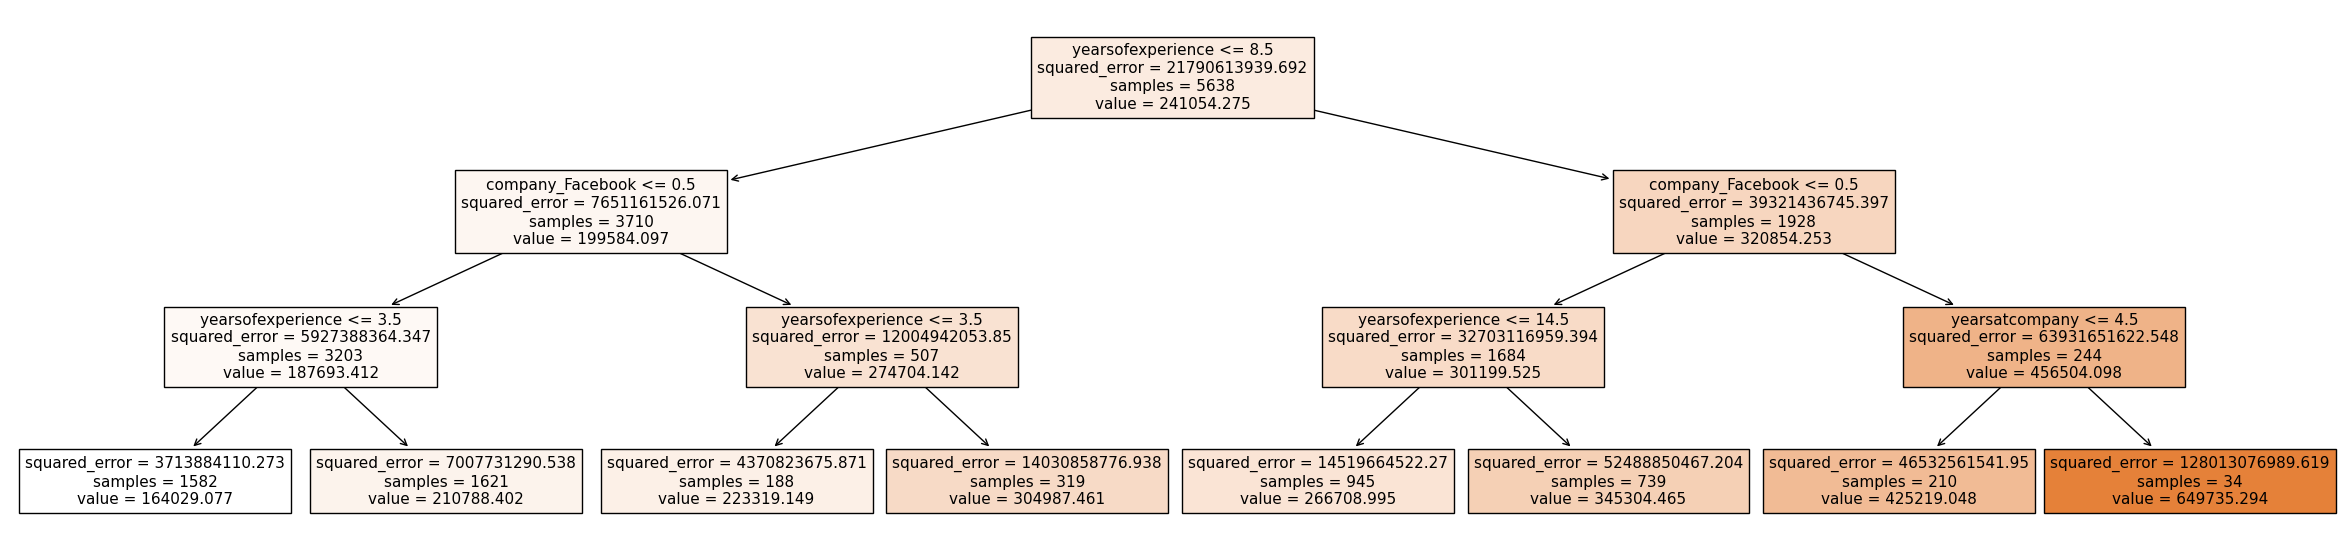

In [61]:

reg_tree_pruned = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
# reg_tree_pruned.fit(X_train, y_train)

plt.figure(figsize=(30, 7))
plot_tree(reg_tree_pruned, filled=True, feature_names=X_train.columns) # type: ignore
plt.show()


similar but distinct from R as per usual - its important to remember the model here is non deterministic & the regression tree algorithm is implemented differently here & in R

### **Don't forget the MSE:**

heres a table to visualize the error margin:

In [98]:
outDF = pd.DataFrame(testing_data)

outDF['Predicted salary'] = predictions
outDF['Actual salary'] = outDF['totalyearlycompensation']
outDF['Predicted salary'] = outDF['Predicted salary'].astype(int)
outDF = outDF[['Predicted salary', 'Actual salary'] + ['company', 'yearsofexperience', 'yearsatcompany', 'gender', 'Race', 'Education']]

outDF.head(15)

,Predicted salary,Actual salary,company,yearsofexperience,yearsatcompany,gender,Race,Education
250,336000,336000,Google,14,7,Male,Hispanic,Master's Degree
5642,475000,475000,Google,13,0,Male,White,Bachelor's Degree
2946,553000,170000,Amazon,15,2,Male,White,Bachelor's Degree
1177,181821,168000,Amazon,3,0,Male,Asian,Master's Degree
7307,355000,355000,Amazon,12,12,Male,Two Or More,Bachelor's Degree
2903,385500,291000,Microsoft,10,7,Male,White,Master's Degree
3730,57857,30000,Oracle,1,1,Male,Asian,Bachelor's Degree
7389,359000,359000,Google,7,0,Male,White,Master's Degree
800,221000,250000,Amazon,8,6,Male,Asian,Master's Degree
2800,299000,333000,Google,3,3,Male,Asian,Bachelor's Degree


& here is the MSE:

In [99]:
y_test = testing_data['totalyearlycompensation']

me  =  (y_test - predictions).mean()
mse = ((y_test - predictions) ** 2).mean()

print("Average Error: ", me, "\t Mean Squared Error: ", mse)

# print(y_test.size, X_test.size, predictions.size)

Average Error:  519.4966454242451 	 Mean Squared Error:  2219361452.363673


### **Next Notebooks: Random Forests and Bootstrap Aggregating (BAgging)**